# Quick Start

This quick start will show how to do the following:

- `Install` everything needed to use pyGAM.
- `fit a model` with custom terms
- search for the `best smoothing parameters`
- plot `partial dependence` functions


## Install pyGAM
#### Pip

    pip install pygam


#### Conda
pyGAM is on conda-forge, however this is typically less up-to-date:

    conda install -c conda-forge pygam
    

#### Bleeding edge
You can install the bleeding edge from github using `flit`.
First clone the repo, ``cd`` into the main directory and do:

    pip install flit
    flit install

### Get `pandas` and `matplotlib`

    pip install pandas matplotlib



## Fit a Model
First we need some data

In [1]:
from pygam.datasets import wage

X, y = wage()

now let's import a GAM that's made for regression problems, as well as the spline term and the factor term, and perform a fit on our dataset.

In [7]:
from pygam import LinearGAM, s, f

gam = LinearGAM(s(0) + s(1) + f(2)).fit(X, y)

Let's take a look at the model fit:

In [8]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

Even though we have 3 terms with a total of `(20 + 20 + 5) = 45` free variables, the default smoothing penalty (`lam=0.6`) reduces the effective degrees of freedom to just ~25.

Let's perform a grid-search to see if we can improve our model. 
We will seek the model with the lowest generalized cross-validation (GCV) score.

In [10]:
gam.gridsearch(X, y, lam=np.logspace(-3,3))
gam.summary()

100% (50 of 50) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     18.8813
Link Function:                     IdentityLink Log Likelihood:                                -24117.1671
Number of Samples:                         3000 AIC:                                            48274.0967
                                                AICc:                                           48274.3754
                                                GCV:                                             1250.2543
                                                Scale:                                           1236.0985
                                                Pseudo R-Squared:                                   0.2944
Feature Function                  Lam

In [12]:
import pygam

In [13]:
pygam.__version__

'0.6.1'

In [11]:
lams = np.exp(np.random.rand(50, 3) * 6 - 3)
gam.gridsearch(X, y, lam=lams)
gam.summary()

KeyboardInterrupt: 

This is a *little* better

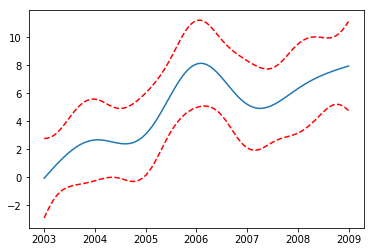

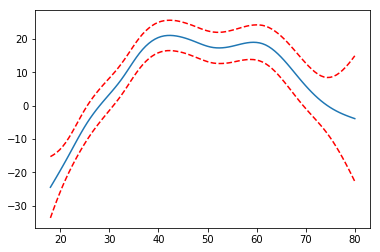

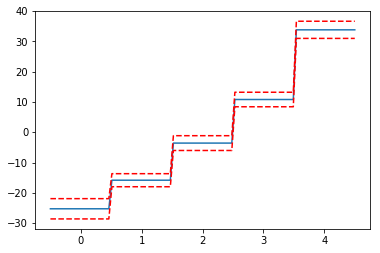

In [6]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
        
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    
    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')

<Figure size 432x288 with 0 Axes>

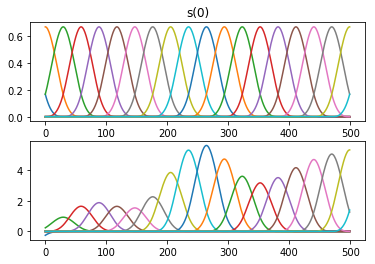

<Figure size 432x288 with 0 Axes>

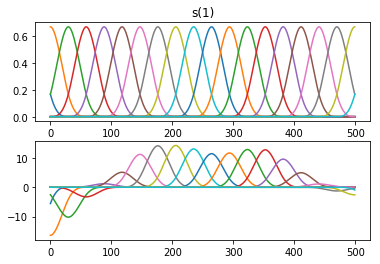

<Figure size 432x288 with 0 Axes>

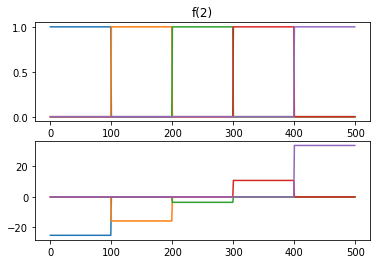

In [7]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    
    # points at which to evaluate the splines
    XX = gam.generate_X_grid(term=i, n=500)
    
    # the splines
    splines = term.build_columns(XX).A
    
    plt.figure()
    fig, axs = plt.subplots(2, 1)
    
    # plot unweighted p-splines
    axs[0].plot(splines)
    axs[0].set_title(repr(term))
    
    # plot weighted p-splines
    idxs = gam.terms.get_coef_indices(i)
    axs[1].plot(splines * gam.coef_[idxs])
    
    plt.show()
    

In [10]:
lams = np.random.randn(100, 3)

In [12]:
from pygam.utils import flatten

In [16]:
np.array(gam.lam)

array([[19.30697729],
       [19.30697729],
       [19.30697729]])

In [19]:
lams = [[1,1,1],[2,2]]

In [5]:
[len(lams_) for lams_ in lams]

[3, 3]

In [6]:
[np.atleast_1d(g) for g in lams]

[array([1, 1, 1]), array([2, 2, 2])]

In [7]:
from pygam.utils import combine

In [16]:
np.unique([str(lams_) for lams_ in [[1,2],[1,2],[3,1]]])

array(['[1, 2]', '[3, 1]'], dtype='<U6')

In [24]:
isinstance(np.asanyarray(lams), np.ndarray)

True

In [27]:
from pygam import *
from pygam.datasets import cake
X, y = cake()
gam = GAM().fit(X, y)

In [28]:
gam.lam

[[0.6], [0.6], [0.6]]

In [30]:
np.random.rand(4,3)

array([[0.54231859, 0.46814152, 0.99475725],
       [0.11364911, 0.89563155, 0.58467183],
       [0.81048357, 0.45594134, 0.91349668],
       [0.76147096, 0.36345234, 0.5599495 ]])

In [22]:
np.asarray(lams).ndim

1

In [13]:
np.unique([tuple(lams_) for lams_ in [[1,2],[1,2],[3,1]]])

array([1, 2, 3])

In [39]:
lens = [len(lam) for lam in lams]

In [40]:
len(np.unique(lens))

1

In [45]:
for lam_ in np.asarray(lams).T:
    print(lam_)

[1 2]
[1 2]
[1 2]


In [57]:
np.asarray(lams).T.tolist()

[[1, 2], [1, 2], [1, 2]]

In [54]:
[print(*lam_) for lam_ in zip(lams)]

[1, 1, 1]
[2, 2, 2]


[None, None]

In [55]:
lams

[[1, 1, 1], [2, 2, 2]]

In [51]:
del lam_